In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("covid_toy.csv")

In [3]:
df

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No
...,...,...,...,...,...,...
95,12,Female,104.0,Mild,Bangalore,No
96,51,Female,101.0,Strong,Kolkata,Yes
97,20,Female,101.0,Mild,Bangalore,No
98,5,Female,98.0,Strong,Mumbai,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        100 non-null    int64  
 1   gender     100 non-null    object 
 2   fever      90 non-null     float64
 3   cough      100 non-null    object 
 4   city       100 non-null    object 
 5   has_covid  100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [5]:
df.isnull().sum()

age           0
gender        0
fever        10
cough         0
city          0
has_covid     0
dtype: int64

In [6]:
df.nunique()

age          55
gender        2
fever         7
cough         2
city          4
has_covid     2
dtype: int64

In [7]:
cat_cols=df.select_dtypes(include=['object']).columns
num_cols=df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables are ",cat_cols)
print("Numerical Variables are ",num_cols)

Categorical Variables are  Index(['gender', 'cough', 'city', 'has_covid'], dtype='object')
Numerical Variables are  ['age', 'fever']


In [8]:
num_cols

['age', 'fever']

age


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


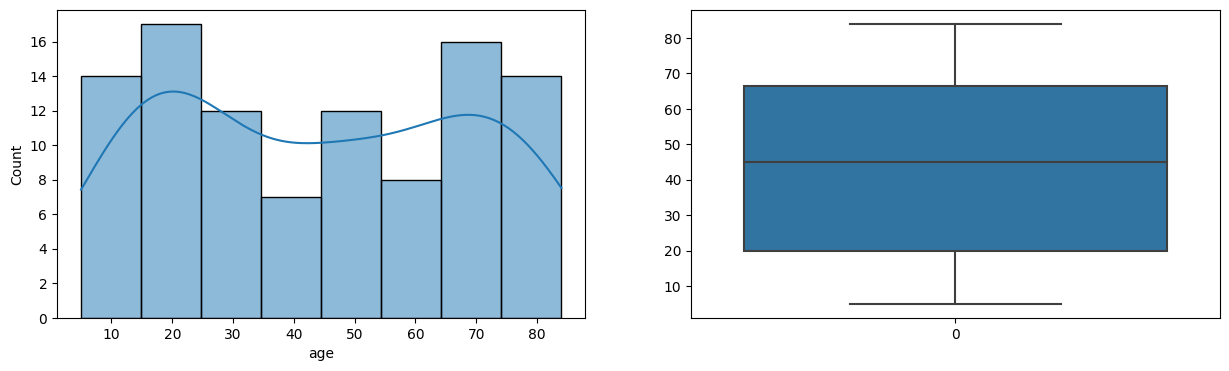

fever


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


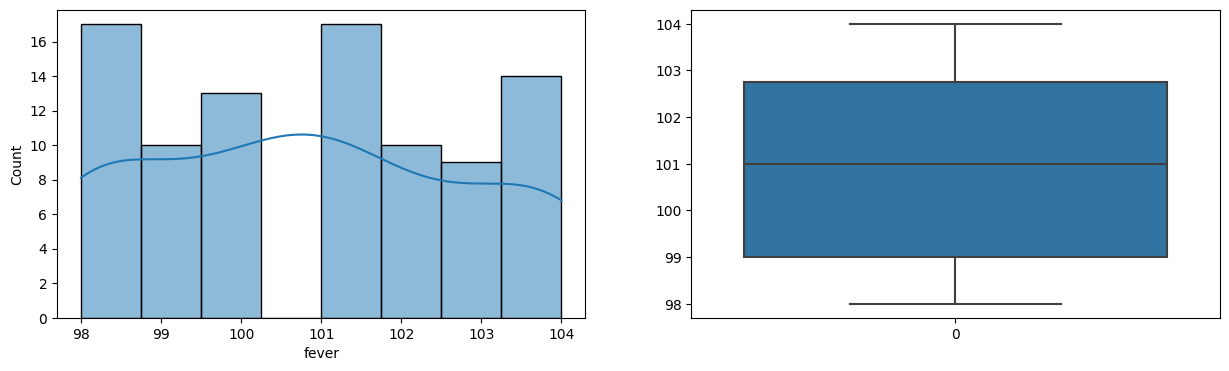

In [9]:
for i in num_cols:
    print(i)
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    sns.histplot(df[i],kde=True)
    plt.subplot(1,2,2)
    sns.boxplot(df[i])
    plt.show()

<Axes: xlabel='fever'>

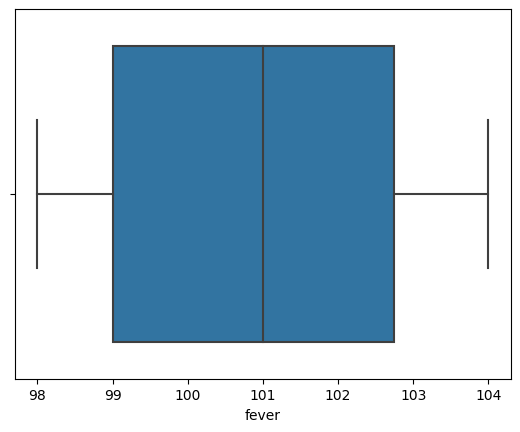

In [10]:
sns.boxplot(data=df,x="fever")

In [11]:
def impute_nan_mean(df,column,mean):
    df[column+'_mean'] = df[column].fillna(mean)
    return df

mean_val = df.fever.mean()
df_mean = impute_nan_mean(df,'fever',mean_val)

In [12]:
df_mean[df_mean.fever.isna()][['fever','fever_mean']]

,fever,fever_mean
5,NaN,100.844444
7,NaN,100.844444
10,NaN,100.844444
19,NaN,100.844444
25,NaN,100.844444
29,NaN,100.844444
41,NaN,100.844444
56,NaN,100.844444
91,NaN,100.844444
94,NaN,100.844444


In [13]:
df

,age,gender,fever,cough,city,has_covid,fever_mean
0,60,Male,103.0,Mild,Kolkata,No,103.0
1,27,Male,100.0,Mild,Delhi,Yes,100.0
2,42,Male,101.0,Mild,Delhi,No,101.0
3,31,Female,98.0,Mild,Kolkata,No,98.0
4,65,Female,101.0,Mild,Mumbai,No,101.0
...,...,...,...,...,...,...,...
95,12,Female,104.0,Mild,Bangalore,No,104.0
96,51,Female,101.0,Strong,Kolkata,Yes,101.0
97,20,Female,101.0,Mild,Bangalore,No,101.0
98,5,Female,98.0,Strong,Mumbai,No,98.0


In [14]:
#df.drop(['age_mode','fever_mode'],axis=1,inplace=True)

In [15]:
df

,age,gender,fever,cough,city,has_covid,fever_mean
0,60,Male,103.0,Mild,Kolkata,No,103.0
1,27,Male,100.0,Mild,Delhi,Yes,100.0
2,42,Male,101.0,Mild,Delhi,No,101.0
3,31,Female,98.0,Mild,Kolkata,No,98.0
4,65,Female,101.0,Mild,Mumbai,No,101.0
...,...,...,...,...,...,...,...
95,12,Female,104.0,Mild,Bangalore,No,104.0
96,51,Female,101.0,Strong,Kolkata,Yes,101.0
97,20,Female,101.0,Mild,Bangalore,No,101.0
98,5,Female,98.0,Strong,Mumbai,No,98.0


In [16]:
df.drop(['fever'],axis=1,inplace = True)

In [17]:
df

,age,gender,cough,city,has_covid,fever_mean
0,60,Male,Mild,Kolkata,No,103.0
1,27,Male,Mild,Delhi,Yes,100.0
2,42,Male,Mild,Delhi,No,101.0
3,31,Female,Mild,Kolkata,No,98.0
4,65,Female,Mild,Mumbai,No,101.0
...,...,...,...,...,...,...
95,12,Female,Mild,Bangalore,No,104.0
96,51,Female,Strong,Kolkata,Yes,101.0
97,20,Female,Mild,Bangalore,No,101.0
98,5,Female,Strong,Mumbai,No,98.0


In [18]:
df.describe()

,age,fever_mean
count,100.000000,100.000000
mean,44.220000,100.844444
std,24.878931,1.948380
min,5.000000,98.000000
25%,20.000000,99.000000
50%,45.000000,100.922222
75%,66.500000,102.000000
max,84.000000,104.000000


In [19]:
df2=df.copy()

### some steps which i have done 

In [20]:
#one_hot_encoded = pd.get_dummies(df2['city'])

In [21]:
#one_hot_encoded

In [22]:
#df_encoded = pd.concat([df2, one_hot_encoded], axis=1)

In [23]:
#boolean=["Kolkata","Delhi","Mumbai","Bangalore"]

In [24]:
#df_encoded[boolean]=df_encoded[boolean].astype(int)

In [25]:
#df_encoded

In [26]:
#df_encoded.isnull().sum()

In [27]:
#df3=df_encoded.copy()

In [28]:
#ohe=pd.get_dummies(df3['cough'])

In [29]:
#ohe

In [30]:
#df3_encoded=pd.concat([df3,ohe],axis=1)

In [31]:
#df3_encoded

In [32]:
#boolean=["Mild","Strong"]

In [33]:
#df3_encoded[boolean]=df3_encoded[boolean].astype(int)

In [34]:
#df3_encoded

In [35]:
#df4=df3_encoded.copy()

### for the prediction streamlit app we have lable encode every column

In [36]:
from sklearn.preprocessing import LabelEncoder 

In [37]:
le=LabelEncoder()

In [38]:
df2['gender'] = le.fit_transform(df2['gender'])

In [39]:
df2

,age,gender,cough,city,has_covid,fever_mean
0,60,1,Mild,Kolkata,No,103.0
1,27,1,Mild,Delhi,Yes,100.0
2,42,1,Mild,Delhi,No,101.0
3,31,0,Mild,Kolkata,No,98.0
4,65,0,Mild,Mumbai,No,101.0
...,...,...,...,...,...,...
95,12,0,Mild,Bangalore,No,104.0
96,51,0,Strong,Kolkata,Yes,101.0
97,20,0,Mild,Bangalore,No,101.0
98,5,0,Strong,Mumbai,No,98.0


#### 

In [40]:
df2['city']= le.fit_transform(df2['city'])

In [41]:
df2

,age,gender,cough,city,has_covid,fever_mean
0,60,1,Mild,2,No,103.0
1,27,1,Mild,1,Yes,100.0
2,42,1,Mild,1,No,101.0
3,31,0,Mild,2,No,98.0
4,65,0,Mild,3,No,101.0
...,...,...,...,...,...,...
95,12,0,Mild,0,No,104.0
96,51,0,Strong,2,Yes,101.0
97,20,0,Mild,0,No,101.0
98,5,0,Strong,3,No,98.0


In [42]:
df2['cough']= le.fit_transform(df2['cough'])

In [43]:
df2

,age,gender,cough,city,has_covid,fever_mean
0,60,1,0,2,No,103.0
1,27,1,0,1,Yes,100.0
2,42,1,0,1,No,101.0
3,31,0,0,2,No,98.0
4,65,0,0,3,No,101.0
...,...,...,...,...,...,...
95,12,0,0,0,No,104.0
96,51,0,1,2,Yes,101.0
97,20,0,0,0,No,101.0
98,5,0,1,3,No,98.0


In [44]:
df3=df2.copy()

In [45]:
df3

,age,gender,cough,city,has_covid,fever_mean
0,60,1,0,2,No,103.0
1,27,1,0,1,Yes,100.0
2,42,1,0,1,No,101.0
3,31,0,0,2,No,98.0
4,65,0,0,3,No,101.0
...,...,...,...,...,...,...
95,12,0,0,0,No,104.0
96,51,0,1,2,Yes,101.0
97,20,0,0,0,No,101.0
98,5,0,1,3,No,98.0


In [46]:
from sklearn.preprocessing import LabelEncoder  

In [47]:
le = LabelEncoder()

In [48]:
df3['has_covid_encoded'] = le.fit_transform(df3['has_covid'])

In [49]:
df3

,age,gender,cough,city,has_covid,fever_mean,has_covid_encoded
0,60,1,0,2,No,103.0,0
1,27,1,0,1,Yes,100.0,1
2,42,1,0,1,No,101.0,0
3,31,0,0,2,No,98.0,0
4,65,0,0,3,No,101.0,0
...,...,...,...,...,...,...,...
95,12,0,0,0,No,104.0,0
96,51,0,1,2,Yes,101.0,1
97,20,0,0,0,No,101.0,0
98,5,0,1,3,No,98.0,0


In [50]:
df3.drop(['has_covid'],axis=1,inplace=True)

In [51]:
df3

,age,gender,cough,city,fever_mean,has_covid_encoded
0,60,1,0,2,103.0,0
1,27,1,0,1,100.0,1
2,42,1,0,1,101.0,0
3,31,0,0,2,98.0,0
4,65,0,0,3,101.0,0
...,...,...,...,...,...,...
95,12,0,0,0,104.0,0
96,51,0,1,2,101.0,1
97,20,0,0,0,101.0,0
98,5,0,1,3,98.0,0


In [52]:
df4=df3.copy()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


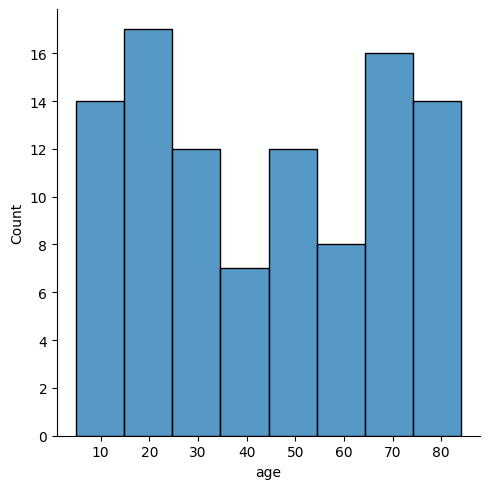

In [53]:
sns.displot(df4['age'])

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Density'>

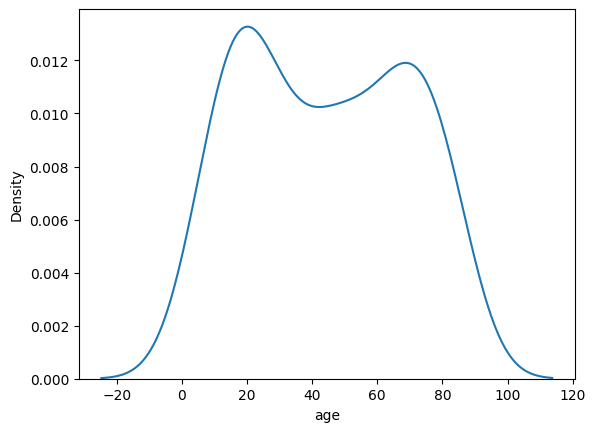

In [54]:
sns.kdeplot(df4['age'])

In [55]:
df5=df4['age']

In [56]:
df5

0     60
1     27
2     42
3     31
4     65
      ..
95    12
96    51
97    20
98     5
99    10
Name: age, Length: 100, dtype: int64

from sklearn.preprocessing import StandardScaler
 
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df7)
scaled_df7_stsc = pd.DataFrame(scaled_data,columns=df7.columns)
scaled_df7_stsc.head()

df8=scaled_df7_stsc.copy()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Density'>

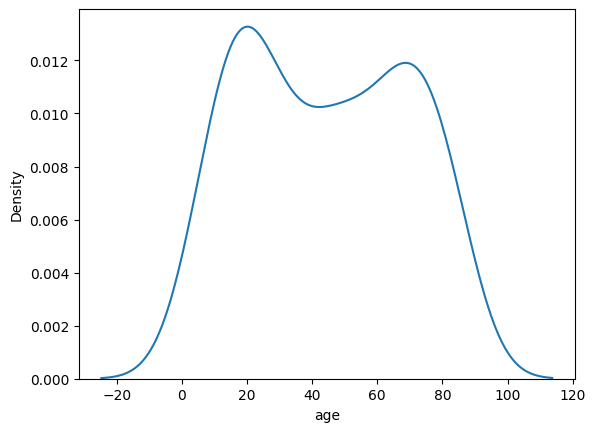

In [57]:
sns.kdeplot(df5)

In [58]:
Df=df4.copy()

In [59]:
Df

,age,gender,cough,city,fever_mean,has_covid_encoded
0,60,1,0,2,103.0,0
1,27,1,0,1,100.0,1
2,42,1,0,1,101.0,0
3,31,0,0,2,98.0,0
4,65,0,0,3,101.0,0
...,...,...,...,...,...,...
95,12,0,0,0,104.0,0
96,51,0,1,2,101.0,1
97,20,0,0,0,101.0,0
98,5,0,1,3,98.0,0


In [60]:
Df.drop(["gender_encoded"],axis=1,inplace=True)

KeyError: "['gender_encoded'] not found in axis"

In [61]:
from sklearn.model_selection import train_test_split


In [62]:
Df=Df.rename(columns={"has_covid_encoded":"has_covid","fever_mean":"fever"})

In [63]:
x=Df.drop(["has_covid"],axis=1)

In [64]:
y=Df["has_covid"]

In [65]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [66]:
y_train

55    1
64    0
84    0
51    1
89    0
     ..
6     0
97    0
5     1
35    0
0     0
Name: has_covid, Length: 80, dtype: int32

In [67]:
x_train

,age,gender,cough,city,fever
55,81,0,0,3,101.000000
64,42,1,0,3,104.000000
84,69,0,1,3,98.000000
51,11,0,1,2,100.000000
89,46,1,1,0,103.000000
...,...,...,...,...,...
6,14,1,1,0,101.000000
97,20,0,0,0,101.000000
5,84,0,0,0,100.844444
35,82,0,1,0,102.000000


In [68]:
y_test

66    0
23    1
69    0
56    0
43    1
87    0
74    0
33    0
9     0
36    0
22    1
94    1
79    1
88    0
39    0
72    0
10    0
25    0
50    1
1     1
Name: has_covid, dtype: int32

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
Lr= LogisticRegression()

In [71]:
Lr.fit(x,y)

C:\Users\Chitwan bajpai\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [72]:
y_pred=Lr.predict(x_test)

In [73]:
y_pred

array([0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1])

In [74]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

In [75]:
accuracy = accuracy_score(y_test, y_pred)

In [76]:
accuracy

0.75

In [77]:
cm = confusion_matrix(y_test, y_pred)

In [78]:
cm

array([[10,  3],
       [ 2,  5]], dtype=int64)

In [79]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [80]:
precision

0.625

In [81]:
recall

0.7142857142857143

In [82]:
f1

0.6666666666666666

In [83]:
###!pip install --upgrade pandas dask sktime


In [84]:
###pip install pycaret[full] pandas dask sktime

<Axes: >

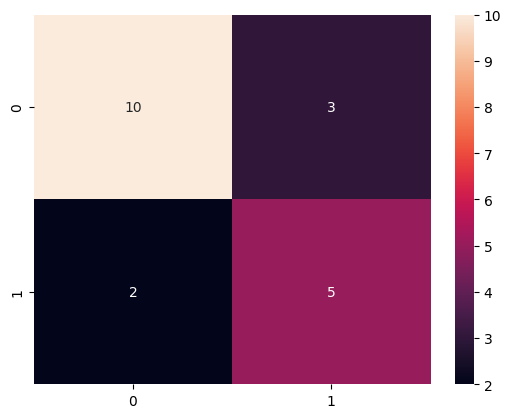

In [85]:
sns.heatmap(cm,annot=True)

## Save the data in a flie

In [86]:
import pickle

- save the model to a file

In [87]:
filename = 'model1.pkl'
with open(filename,'wb') as file:
    pickle.dump(Lr,file)